<a href="https://colab.research.google.com/github/Snehal-Gloria/deep-learning-keras-tf-tutorial/blob/master/eg_internship_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
train_dir = '/content/drive/MyDrive/Concrete-Crack-Detection/Train'
val_dir = '/content/drive/MyDrive/Concrete-Crack-Detection/Test'

In [ ]:
img_size = (512, 512)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 7797 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r= model.fit(train_generator,
                    epochs=1,
                    validation_data=test_generator)

244/244 [==============================] - 4660s 19s/step - loss: 0.1557 - accuracy: 0.9769 - val_loss: 2.2916 - val_accuracy: 0.4997


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

 5/63 [=>............................] - ETA: 19s - loss: 2.3679 - accuracy: 0.4812

KeyboardInterrupt: ignored

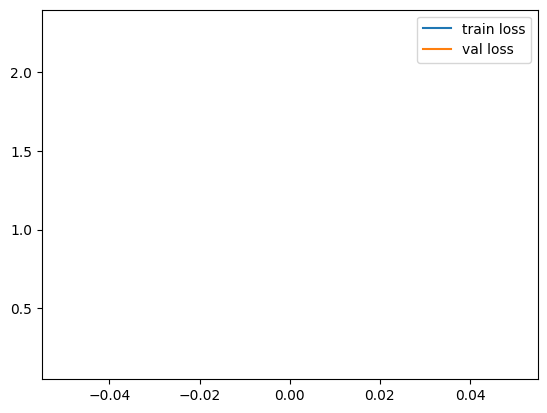

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

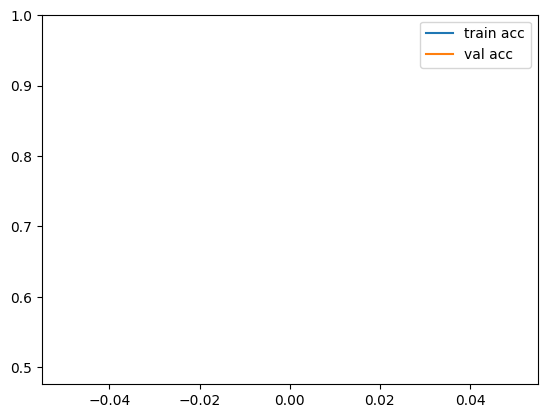

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accval_acc.png')

In [ ]:
def predict_class(image_path):
    img = Image.open(image_path)
    img = img.resize(img_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    class_names = ['crack', 'noncrack']
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

In [ ]:
def display_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the BGR image to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/CRACK500_20160222_080933_361_1281.jpg'

1/1 [==============================] - 0s 30ms/step
Predicted class: noncrack


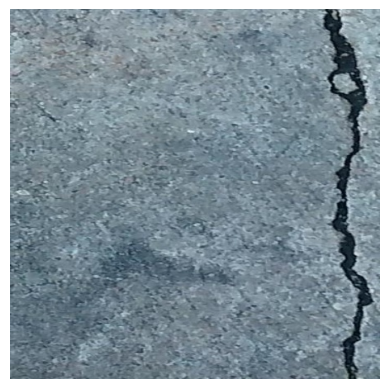

In [ ]:
predicted_class = predict_class(image_path)
print('Predicted class:', predicted_class)

# Display the image using the created function
display_image(image_path)

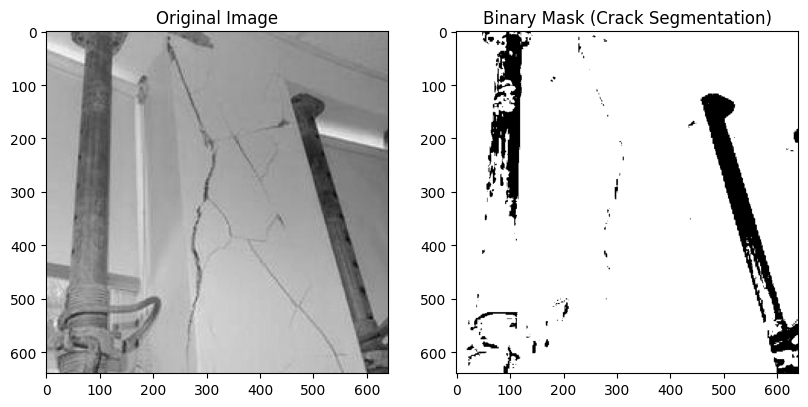

Crack Percentage of the image is 92.23%
Damage Level: moderate


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def calculate_crack_percentage(img, binary_mask):
    # Count the cracked pixels in the binary mask
    cracked_pixels = np.count_nonzero(binary_mask)

    # Calculate crack percentage based on cracked pixels
    crack_percentage = (cracked_pixels / img.size) * 100

    # Display the original image, binary mask, and background image for reference
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask (Crack Segmentation)')

    # Create a black image as the background
    background = np.zeros_like(img)

    # plt.subplot(1, 3, 3)
    # plt.imshow(background, cmap='gray')
    # plt.title('Background (Cracks Only)')

    plt.show()

    return crack_percentage

def classify_damage_level(crack_percentage):
    if crack_percentage == 100:
        return 'No Crack'
    elif 95 <= crack_percentage < 100:
        return 'mild'
    elif 70 <= crack_percentage < 95:
        return 'moderate'
    else:
        return 'major'

def track_cracks(image_path, threshold=100):
    # Read the image
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

    # Apply thresholding to obtain binary mask
    _, binary_mask = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    # Calculate crack percentage
    crack_percentage = calculate_crack_percentage(img, binary_mask)

    # Classify damage level
    damage_level = classify_damage_level(crack_percentage)

    print(f'Crack Percentage of the image is {crack_percentage:.2f}%')
    print(f'Damage Level: {damage_level}')

# Specify the file path of the image
image_file = image_path

# Process the specified image
track_cracks(image_file)


In [ ]:

import pandas as pd
import random

# Read the CSV file
csv_file_path = '/content/drive/MyDrive/Book1.csv'
severity_df = pd.read_csv(csv_file_path)


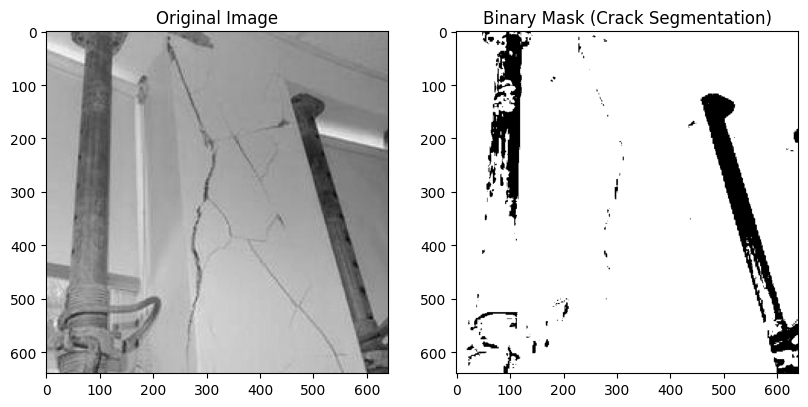

solution your the damage: Strengthen connections and joints in the affected area.


In [ ]:
import random

def classify_damage_level(crack_percentage, severity_df):
    if crack_percentage == 100:
        return 'No Crack'
    elif 95 <= crack_percentage < 100:
        return get_random_severity_solution('mild', severity_df)
    elif 70 <= crack_percentage < 95:
        return get_random_severity_solution('moderate', severity_df)
    else:
        return get_random_severity_solution('major', severity_df)

def get_random_severity_solution(severity, severity_df):
    solutions = severity_df.loc[severity_df['severity'] == severity, 'solution'].tolist()
    random.shuffle(solutions)

    if solutions:
        return solutions.pop()
    else:
        return 'Severity not found in the CSV file.'
def track_cracks(image_path, threshold=100, severity_df=None):
    # Read the image
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

    # Apply thresholding to obtain binary mask
    _, binary_mask = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    # Calculate crack percentage
    crack_percentage = calculate_crack_percentage(img, binary_mask)

    # Classify damage level and get severity solution
    damage_level = classify_damage_level(crack_percentage, severity_df)


    # print(f'Crack Percentage in {image_path}: {crack_percentage:.2f}%')
    print(f'solution your the damage: {damage_level}')

# Specify the file path of the image
image_file = image_path


# Process the specified image
track_cracks(image_file, severity_df=severity_df)


In [ ]:
model.save('image_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
